In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# scikit learn imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
# evaluation for model imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

## preddicting heart disease
## this notebook looks into using various python libraries in an attempt to build machine learning model of predicting whether or not someone has heart disease or not using medical attributes

# going to follow approach as follows:
* problem definition
* data
* evaluation
* features
* modelling
* experimentation

## problem definition
* given medical parameters about a patient, predicting whether a patient has heart disease or not

## creating data dictionary
* slope_of_peak_exercise_st_segment (type: int) : the slope of the peak exercise , an electrocardiography read out indicating   quality of blood flow to the heart
* thal (type: categorical): results of  measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
* resting_blood_pressure (type: int): resting blood pressure
* chest_pain_type (type: int): chest pain type (4 values)
* num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
* fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
* resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
* serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
* oldpeak_eq_st_depression (type: float): oldpeak =  induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* sex (type: binary): 0: female, 1: male
* age (type: int): age in years
* max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
* exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

In [ ]:
dataframe=pd.read_csv("values.csv")
dataframe

In [1]:
dataframe.columns

NameError: name 'dataframe' is not defined

In [ ]:
dataframe.isna().sum()

In [ ]:
DF=pd.read_csv("labels.csv")
DF

In [6]:
# dropping patients id as it is not needed to be considered while building a machine learning model
DF=DF.drop("patient_id", axis=1)
DF

,heart_disease_present
0,0
1,0
2,1
3,1
4,0
...,...
175,1
176,1
177,1
178,0


In [7]:
DF.isna().sum()

heart_disease_present    0
dtype: int64

In [8]:
# concatinating two dataframes
Data=pd.concat([dataframe, DF], axis=1, join='inner')
display(Data)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [9]:
Data.isna().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [17]:
Data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [18]:
Data.shape

(180, 15)

In [19]:
len(Data)

180

In [20]:
Data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [21]:
Data=Data.drop("patient_id", axis=1)
Data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [22]:
Data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [24]:
Data.index

RangeIndex(start=0, stop=180, step=1)

In [25]:
Data["heart_disease_present"].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [26]:
Data["sex"].value_counts()

1    124
0     56
Name: sex, dtype: int64

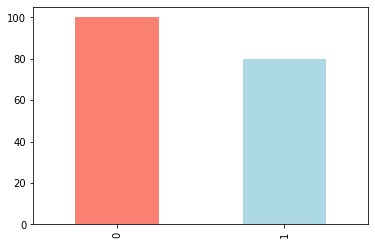

In [27]:
Data["heart_disease_present"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [28]:
Data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

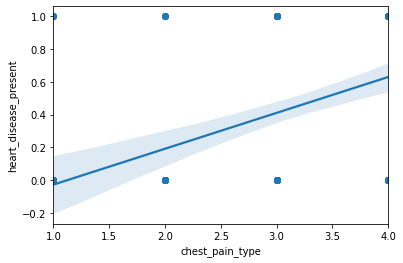

In [30]:
sns.regplot(x="chest_pain_type",y="heart_disease_present", data=Data);

* regplot is used to show the lnear relationship between two variables. 
* here, linear relationship between two variables is positive, hence, chest pain type is contributing to have heart disease present in a patient

* Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

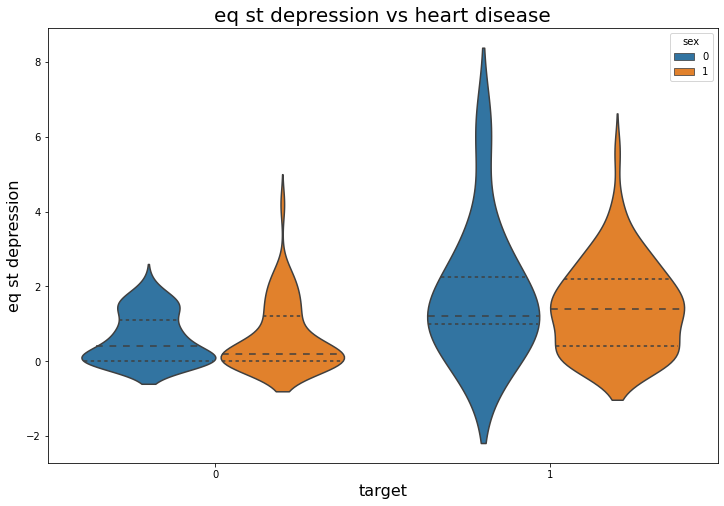

In [31]:
plt.figure(figsize=(12,8))
sns.violinplot(x="heart_disease_present", y="oldpeak_eq_st_depression", hue="sex", inner="quartile", data=Data)
plt.title("eq st depression vs heart disease", fontsize=20)
plt.xlabel("target", fontsize=(16))
plt.ylabel("eq st depression", fontsize=16);

* observation1:We can see that the overall shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we don’t see many differences between male & female target outcomes.

In [32]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [33]:
Data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [34]:
over_50=Data[Data["age"]>50]
over_50.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
6,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1


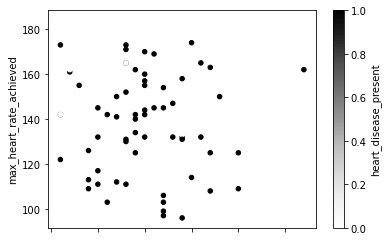

In [35]:
# plotting scatter plots only for 50 years above age
over_50.plot(kind="scatter",
            x="age",
            y="max_heart_rate_achieved",
            c="heart_disease_present");

* people above age 50 are more likely to have heart disease as the dot color is increasing towards 1 

<AxesSubplot:>

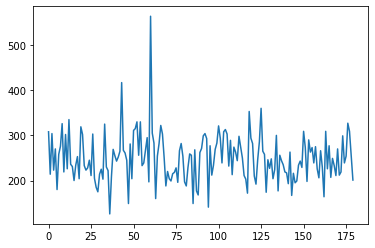

In [36]:
Data["serum_cholesterol_mg_per_dl"].plot()

Text(26.044592013888902, 0.5, 'st_segment')

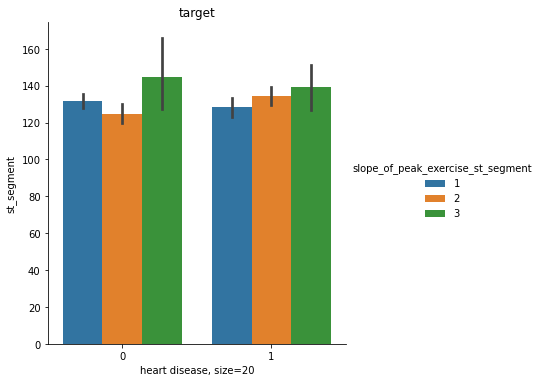

In [37]:
sns.catplot(x="heart_disease_present",y="resting_blood_pressure", hue="slope_of_peak_exercise_st_segment", kind="bar", data=Data)
plt.title("target")
plt.xlabel("heart disease, size=20")
plt.ylabel("st_segment")

* observation2:ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease.  low ST Depression yields people at greater risk for heart disease. While a high ST depression is considered normal & healthy. The “slope” hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

In [38]:
categorical_val=[]
continous_val=[]
for column in Data.columns:
    if len(Data[column].unique())<=10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

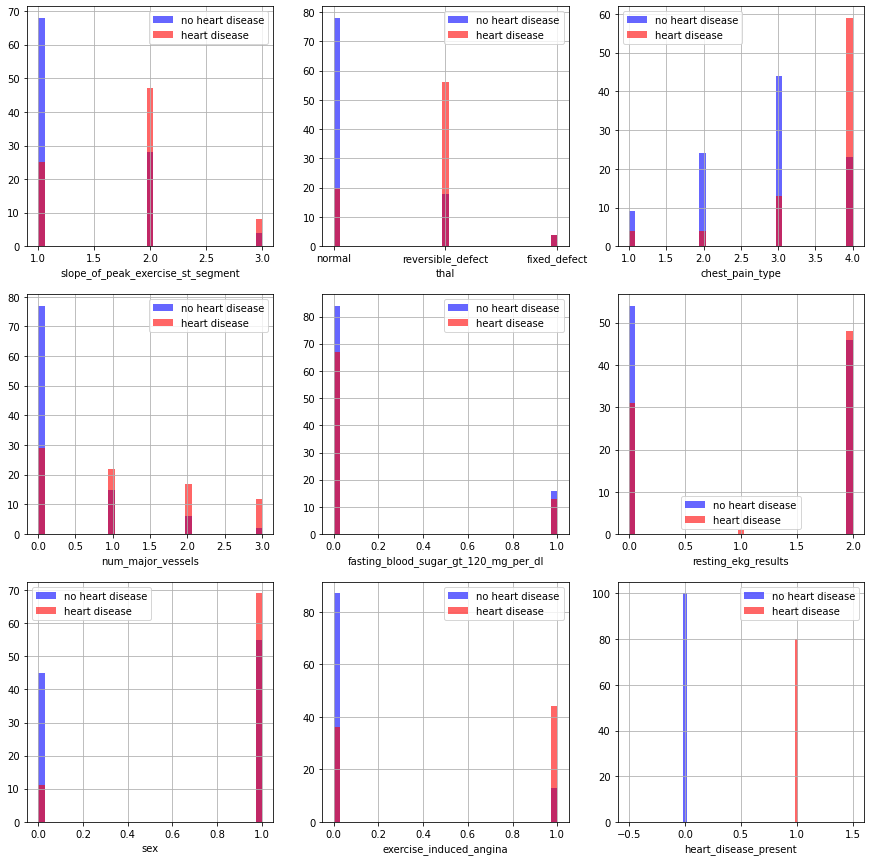

In [39]:
plt.figure(figsize=(15,15))
for i, column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    Data[Data["heart_disease_present"]==0][column].hist(bins=35,color="blue", label="no heart disease", alpha=0.6)
    Data[Data["heart_disease_present"]==1][column].hist(bins=35, color="red", label="heart disease", alpha=0.6)
    plt.legend()
    plt.xlabel(column)

#### Data.columns

#### Data.columns

## 

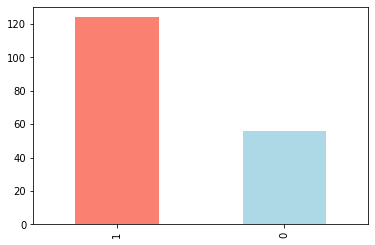

In [41]:
Data["sex"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [42]:
pd.crosstab(Data.heart_disease_present,Data.sex)

sex,0,1
heart_disease_present,,
0,45,55
1,11,69


* cross tab showing heart disease present on basis of sex.
* 0 indicates female, and 1 indicates male.
* so there are 45 females who does not have heart disease, and 11 who has heart disease
* in case, of males, there are 55 patients who doesnot have heart disease and 69 patients who has heart disease

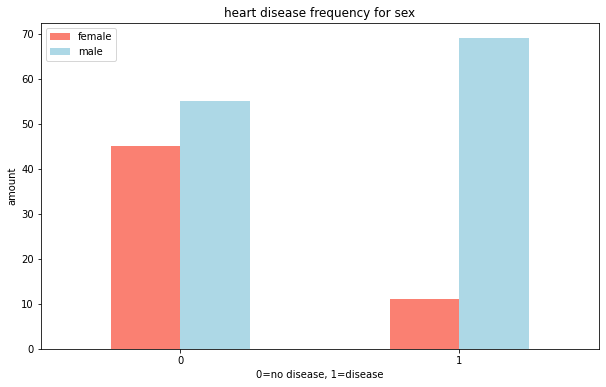

In [43]:
# create a plot of crosstab
pd.crosstab(Data.heart_disease_present,Data.sex).plot(kind="bar",
                                                      figsize=(10,6),
                                                      color=["salmon","lightblue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0=no disease, 1=disease")
plt.ylabel("amount")
plt.legend(["female","male"])
plt.xticks(rotation=0);

## age vs heart disease

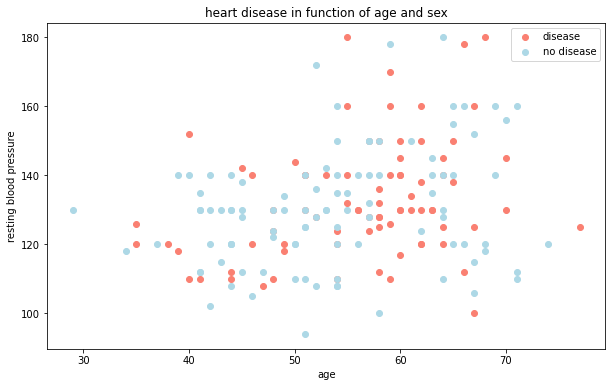

In [44]:
# another figure plotting age and heart disease
plt.figure(figsize=(10,6))
# scatter with positive target
plt.scatter(Data.age[Data.heart_disease_present==1],
           Data.resting_blood_pressure[Data.heart_disease_present==1],
           c="salmon");
# scatter with negetive target
plt.scatter(Data.age[Data.heart_disease_present==0],
           Data.resting_blood_pressure[Data.heart_disease_present==0],
           c="lightblue");
# add some information
plt.title("heart disease in function of age and sex")
plt.xlabel("age")
plt.ylabel("resting blood pressure")
plt.legend(["disease","no disease"]);

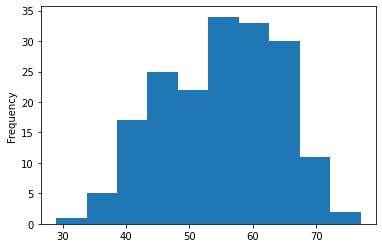

In [45]:
# checking distribution of clumns with histograms
Data.age.plot.hist();

In [46]:
Data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [47]:
import warnings
warnings.filterwarnings("ignore")

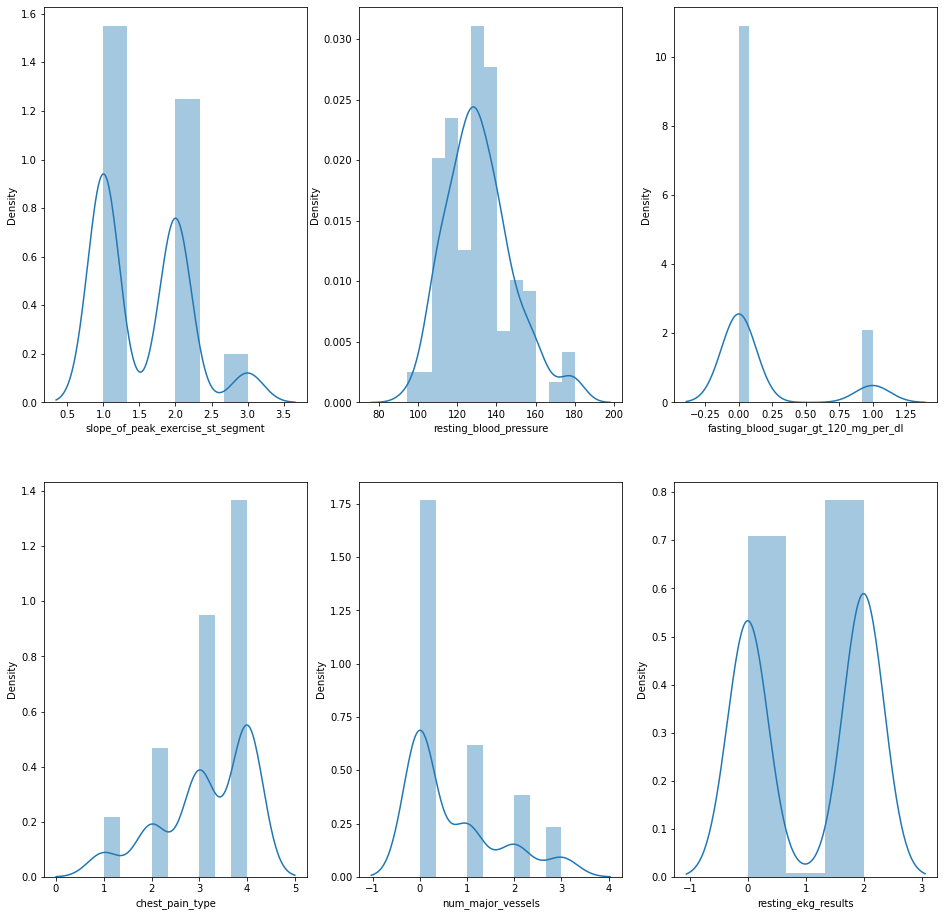

In [48]:
figure,ax=plt.subplots(2,3, figsize=(16,16))
sns.distplot(Data["slope_of_peak_exercise_st_segment"],ax=ax[0,0])
sns.distplot(Data["resting_blood_pressure"],ax=ax[0,1])
sns.distplot(Data["chest_pain_type"],ax=ax[1,0])
sns.distplot(Data["num_major_vessels"],ax=ax[1,1])
sns.distplot(Data["fasting_blood_sugar_gt_120_mg_per_dl"],ax=ax[0,2])
sns.distplot(Data["resting_ekg_results"],ax=ax[1,2]);

In [49]:
dummies=pd.get_dummies(Data["thal"])
dummies

,fixed_defect,normal,reversible_defect
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
175,0,0,1
176,0,1,0
177,0,0,1
178,0,1,0


In [50]:
df=pd.concat([dataframe, DF], axis=1, join='inner')
display(df)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [51]:
df=pd.concat([Data, dummies],axis=1, join="inner")
display(df)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1,0,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1,0,1,0
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1,0,0,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0,0,1,0


In [52]:
df=df.drop("thal", axis=1)
df

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1,0,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1,0,1,0
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1,0,0,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0,0,1,0


In [53]:
df

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1,0,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1,0,1,0
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1,0,0,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0,0,1,0


In [54]:
df.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224,0.157263,-0.305492,0.243341
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506,0.127950,-0.098964,0.046578
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829,-0.007042,-0.300914,0.307524
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519,-0.015493,-0.185283,0.194026
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379,0.125474,-0.023938,-0.028324
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933,0.043308,0.023521,-0.041946
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775,-0.090092,0.021710,0.015760
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930,0.055930,-0.332991,0.313616
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421,0.144932,-0.421950,0.366381
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.138255,0.070984,-0.049719,0.020593


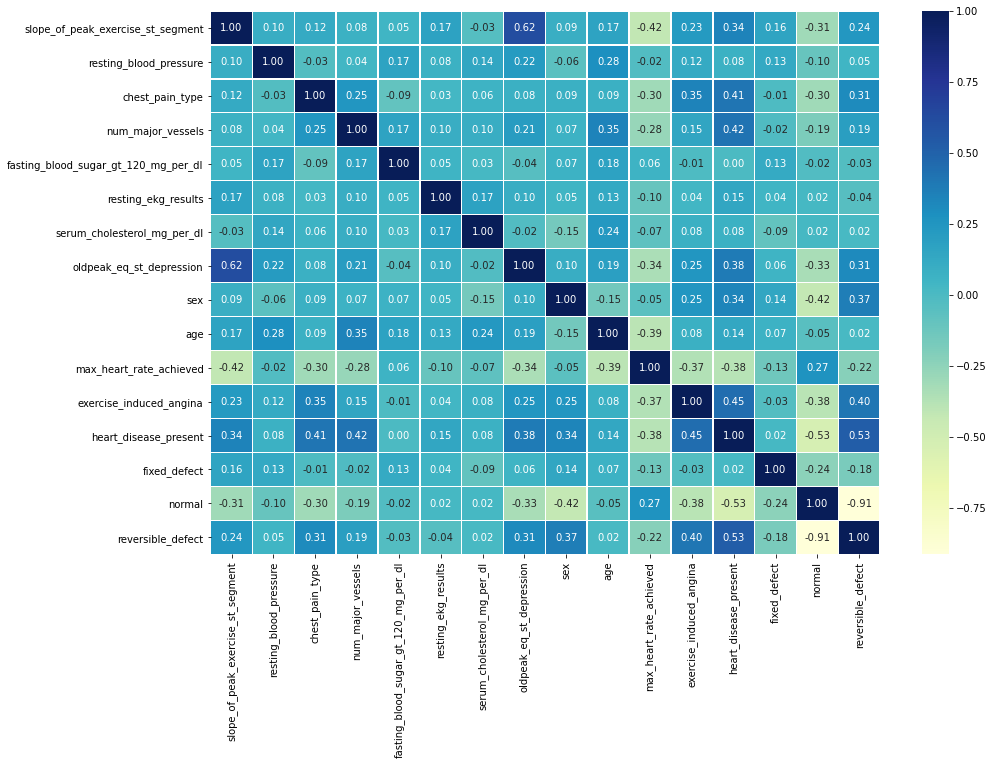

In [55]:
# making a correlation matrix
corr_matrix =df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax =sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");

<AxesSubplot:title={'center':'correlation with heart disease present'}>

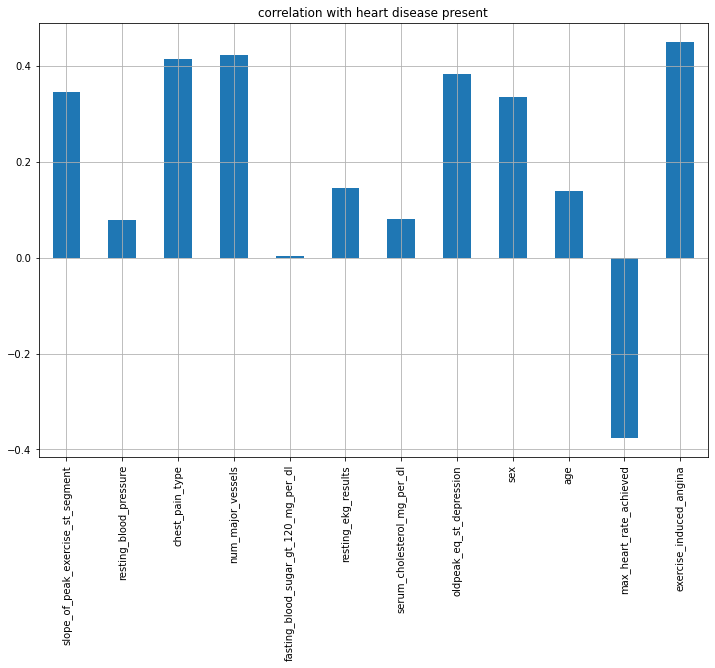

In [56]:
Data.drop("heart_disease_present", axis=1).corrwith(Data.heart_disease_present).plot(kind="bar", grid=True, figsize=(12,8),
                                                                                     title="correlation with heart disease present")

* observation3: We can see there is a positive correlation between all variables & heart_disease_present (our predictor). 
* This makes sense since, the greater amount of chest pain and all other variables,  results in a greater chance of having heart disease. 
* Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.
* there is a negative correlation between exercise induced angina (exang) & heart disease present predictor. This makes sense because while excercise, heart requires more blood, but narrowed arteries slow down blood flow.

## modelling

In [57]:
df.head().T

,0,1,2,3,4
slope_of_peak_exercise_st_segment,1.0,2.0,1.0,1.0,3.0
resting_blood_pressure,128.0,110.0,125.0,152.0,178.0
chest_pain_type,2.0,3.0,4.0,4.0,1.0
num_major_vessels,0.0,0.0,3.0,0.0,0.0
fasting_blood_sugar_gt_120_mg_per_dl,0.0,0.0,0.0,0.0,0.0
resting_ekg_results,2.0,0.0,2.0,0.0,2.0
serum_cholesterol_mg_per_dl,308.0,214.0,304.0,223.0,270.0
oldpeak_eq_st_depression,0.0,1.6,0.0,0.0,4.2
sex,1.0,0.0,1.0,1.0,1.0
age,45.0,54.0,77.0,40.0,59.0


In [58]:
# split into x and y
x =df.drop("heart_disease_present", axis=1)
y=df["heart_disease_present"]

In [59]:
x.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,fixed_defect,normal,reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,0,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


In [60]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [61]:
# split data into train , test
np.random.seed(42)
x_train, x_test, y_train, y_test= train_test_split(x,
                                                  y,
                                                  test_size=0.2)

In [62]:
x_train

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,fixed_defect,normal,reversible_defect
117,1,110,4,0,0,2,172,0.0,1,41,158,0,0,0,1
65,1,126,4,0,0,2,282,0.0,1,35,156,1,0,0,1
67,2,115,4,0,0,0,303,1.2,1,43,181,0,0,1,0
31,2,150,4,3,0,2,225,1.0,0,65,114,0,0,0,1
12,1,140,3,0,0,0,335,0.0,1,64,158,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,112,4,0,0,0,204,0.1,1,47,143,0,0,1,0
106,1,150,3,0,0,2,232,1.6,1,54,165,0,0,0,1
14,2,120,1,0,0,0,231,3.8,1,38,182,1,0,0,1
92,1,135,3,0,1,0,304,0.0,0,54,170,0,0,1,0


In [63]:
y_train

117    1
65     1
67     0
31     1
12     1
      ..
71     0
106    0
14     1
92     0
102    1
Name: heart_disease_present, Length: 144, dtype: int64

## machine learning model
* train it(find patterns) on training set
* test it( use patterns) on test set
## going to try different machine learning models
* logistic regression
* kneighbors classifier
* sgd classifier
* random forest classifier

In [64]:
# logistic regression
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)
lm =LogisticRegression()
lm.fit(x_train,y_train)
lm.score=lm.score(x_test, y_test)
lm.score

0.8611111111111112

In [65]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8055555555555556

In [66]:
# sgd classifier
from sklearn.linear_model import SGDClassifier
np.random.seed(42)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
sgd =SGDClassifier()
sgd.fit(x_train,y_train)
sgd.score(x_test,y_test)

0.4722222222222222

In [ ]:
# kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

## function to know accuracy of different models

In [68]:
# combining scores of different models
models= {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "SGDClassifier": SGDClassifier(),
        "RandomForestClassifier": RandomForestClassifier()}
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [69]:
model_scores=fit_and_score(models=models,
                          x_train= x_train,
                          x_test =x_test,
                          y_train= y_train,
                          y_test= y_test)
model_scores

{'Logistic Regression': 0.8611111111111112,
 'KNN': 0.5277777777777778,
 'SGDClassifier': 0.5833333333333334,
 'RandomForestClassifier': 0.8333333333333334}

* as random forest classifier and logistic regression have more accuracy, continue with those models 

## comparing model accuracy

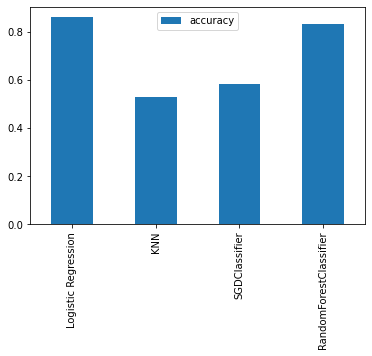

In [70]:
# compare model accuracy
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [71]:
# continuing with logistic regression and random forest classifier

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
#trying n estimators to check best score for estimators
np.random.seed(42)
for i in range(10,60,10):
    print(f"trying model with {i} estimators")
    lm =LogisticRegression(n_jobs=i).fit(x_train, y_train)
    print(f"model accuracy on test set:{lm.score(x_test,y_test)*100:2f}%")
    print("")

trying model with 10 estimators
model accuracy on test set:86.111111%

trying model with 20 estimators
model accuracy on test set:86.111111%

trying model with 30 estimators
model accuracy on test set:86.111111%

trying model with 40 estimators
model accuracy on test set:86.111111%

trying model with 50 estimators
model accuracy on test set:86.111111%



In [74]:
# random forest classifier
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with{i} estimators")
    rf= RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test set:{rf.score(x_test,y_test)*100:2f}%")
    print("")

trying model with10 estimators
model accuracy on test set:77.777778%

trying model with20 estimators
model accuracy on test set:83.333333%

trying model with30 estimators
model accuracy on test set:83.333333%

trying model with40 estimators
model accuracy on test set:80.555556%

trying model with50 estimators
model accuracy on test set:83.333333%

trying model with60 estimators
model accuracy on test set:86.111111%

trying model with70 estimators
model accuracy on test set:80.555556%

trying model with80 estimators
model accuracy on test set:83.333333%

trying model with90 estimators
model accuracy on test set:86.111111%



# other parameters
* hyperparameter tuning
* feature importance
* confusion matrix
* precision score
* recall
* f1 score
* classification report
* roc curve
* area under curve

# hyperparameter tuning

In [75]:
# tune lm
train_scores=[]
test_scores=[]
# create a list of different values for n_jobs
jobs= range(1,21)
# set up lm instance
lm =KNeighborsClassifier()
# loop through different n_jobs
for i in jobs:
    lm.set_params(n_jobs=i)
    #fit algorithm
    lm.fit(x_train ,y_train)
    # update test scores list
    train_scores.append(lm.score(x_train,y_train))
    # update test scores
    test_scores.append(lm.score(x_test,y_test))

In [76]:
train_scores

[0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75]

In [77]:
test_scores

[0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778,
 0.5277777777777778]

maximum lm score on test data:52.78%


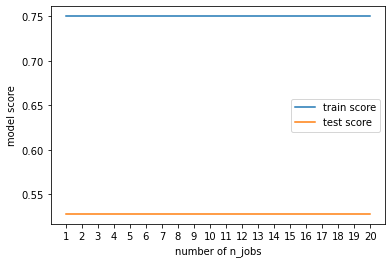

In [78]:
plt.plot(jobs, train_scores, label="train score")
plt.plot(jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_jobs")
plt.ylabel("model score")
plt.legend()
print(f"maximum lm score on test data:{max(test_scores)*100:.2f}%")

* observation4: we can observe that the model is performing well on train data, where as it is failing to perform well on test data
* so it is a case of overfitting

In [79]:
# creating list of differrent values to know best score

In [80]:
# tune rf
train_scores=[]
test_scores=[]
# create a list of different values for n_estimators
estimators=range(1,21,1)
# set up rf instance
rf= RandomForestClassifier()
# loop through different estimators
for i in estimators:
    rf.set_params(n_estimators=i)
    # fit algorithm
    rf.fit(x_train,y_train)
    # update test scores list
    train_scores.append(rf.score(x_train,y_train))
    # update test scores list
    test_scores.append(rf.score(x_test,y_test))

In [81]:
train_scores

[0.9166666666666666,
 0.8958333333333334,
 0.9583333333333334,
 0.9513888888888888,
 0.9791666666666666,
 1.0,
 0.9930555555555556,
 0.9930555555555556,
 1.0,
 0.9861111111111112,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9930555555555556,
 1.0,
 0.9930555555555556,
 0.9930555555555556,
 1.0,
 1.0]

In [82]:
test_scores

[0.6944444444444444,
 0.6666666666666666,
 0.8055555555555556,
 0.7777777777777778,
 0.75,
 0.8055555555555556,
 0.75,
 0.8333333333333334,
 0.8055555555555556,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.7777777777777778,
 0.8055555555555556,
 0.8055555555555556,
 0.8611111111111112,
 0.8611111111111112,
 0.8333333333333334]

maximum rf score on test data:86.11%


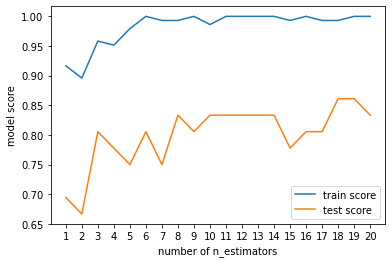

In [83]:
plt.plot(estimators, train_scores,label="train score")
plt.plot(estimators, test_scores,label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_estimators")
plt.ylabel("model score")
plt.legend()
print(f"maximum rf score on test data:{max(test_scores)*100:.2f}%")

* observation5: model score has iincreased by3% comparing to previous model

In [84]:
model_scores

{'Logistic Regression': 0.8611111111111112,
 'KNN': 0.5277777777777778,
 'SGDClassifier': 0.5833333333333334,
 'RandomForestClassifier': 0.8333333333333334}

* observation: as the training and testing scores are increasing, we can continue to increase scores byevaluating model

In [85]:
# score on training data vs test data

In [86]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

1.0

In [87]:
rf.score(x_test,y_test)

0.7777777777777778

In [88]:
y_preds=rf.predict(x_test)
y_preds

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [89]:
rf.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [90]:
# compare preictions to truth labels to evaluate model
y_preds=rf.predict(x_test)
np.mean(y_preds==y_test)

0.7777777777777778

In [91]:
rf.score(x_test,y_test)

0.7777777777777778

In [92]:
from sklearn.metrics import accuracy_score
np.mean(y_preds==y_test)

0.7777777777777778

## making predictions with predict proba

In [93]:
# predict proba is to find the probabilities of predictions model has made

In [94]:
rf.predict_proba(x_test[:5])

array([[0.95, 0.05],
       [0.85, 0.15],
       [0.6 , 0.4 ],
       [0.05, 0.95],
       [0.8 , 0.2 ]])

In [95]:
rf.predict(x_test[:5])

array([0, 0, 0, 1, 0], dtype=int64)

In [96]:
#  Cross-validation is a statistical method used to estimate the skill of machine learning models

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=df.drop("heart_disease_present",axis=1)
y=df["heart_disease_present"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
rf=RandomForestClassifier()
rf.fit(x_train,y_train);

In [98]:
rf.score(x_test,y_test)

0.8055555555555556

In [99]:
cross_val_score(rf,x,y)

array([0.77777778, 0.88888889, 0.86111111, 0.75      , 0.77777778])

In [100]:
np.random.seed(42)
# single training and test split score
rf_single_score=rf.score(x_test,y_test)
# take mean of five fold cross validation score
rf_cross_val_score=np.mean(cross_val_score(rf,x,y,cv=5))
# compare two
rf_single_score,rf_cross_val_score

(0.8055555555555556, 0.8111111111111111)

In [101]:
cross_val_score(rf,x,y,cv=5,scoring=None)

array([0.77777778, 0.88888889, 0.88888889, 0.72222222, 0.75      ])

In [101]:
np.mean(rf_cross_val_score)

0.8111111111111111

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        16
           1       0.93      0.65      0.76        20

    accuracy                           0.78        36
   macro avg       0.81      0.79      0.78        36
weighted avg       0.82      0.78      0.78        36



# ROC curve

* A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR).The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [103]:
from sklearn.metrics import roc_curve

# fit classifier
rf.fit(x_train,y_train)
# make predictions with probabilities
y_probs=rf.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.81, 0.19],
       [0.69, 0.31],
       [0.  , 1.  ],
       [0.82, 0.18],
       [0.2 , 0.8 ],
       [0.72, 0.28],
       [0.98, 0.02],
       [0.43, 0.57],
       [0.05, 0.95]])

In [104]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.19, 0.31, 1.  , 0.18, 0.8 , 0.28, 0.02, 0.57, 0.95])

In [105]:
# calculate fpr,tpr, and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
# check false positive rates
fpr

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1875, 0.1875,
       0.3125, 0.3125, 0.4375, 0.5625, 0.625 , 0.6875, 0.8125, 0.875 ,
       0.9375, 1.    ])

## roc curves

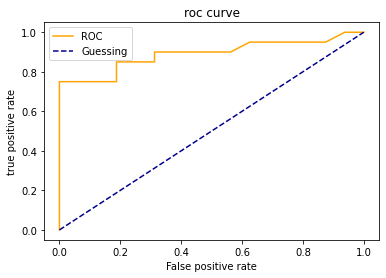

In [106]:
# function to plotting roc curves
def plot_roc_curve(fpr,tpr):
    #plot roc curve
    plt.plot(fpr, tpr,color="orange", label="ROC")
    # plot line with no predictive power
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--", label="Guessing")
    # custommizing plot
    plt.xlabel("False positive rate")
    plt.ylabel("true positive rate")
    plt.title("roc curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8906250000000001

* AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve(think integral calculus) from (0,0) to (1,1)

In [108]:
# perfect roc score
roc_auc_score(y_test,y_test)

1.0

In [109]:
from sklearn.metrics import confusion_matrix
y_preds=rf.predict(x_test)
confusion_matrix(y_preds,y_test)

array([[15,  5],
       [ 1, 15]], dtype=int64)

In [110]:
pd.crosstab(y_preds,y_test)

heart_disease_present,0,1
row_0,,
0,15,5
1,1,15


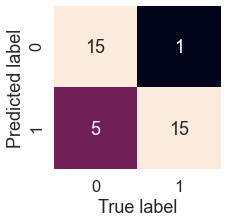

In [111]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_preds,y_test):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_preds,y_test),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

In [112]:
len(y_test)

36

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



## using scooring parameter

In [114]:
from sklearn.model_selection import cross_val_score
rf= RandomForestClassifier(n_estimators=100)

In [115]:
# set random seed 
np.random.seed(42)
cv_acc = cross_val_score(rf, x, y, cv=5)
cv_acc

array([0.77777778, 0.86111111, 0.86111111, 0.77777778, 0.77777778])

In [116]:
# scoring accuracy
np.random.seed(42)
cv_acc =cross_val_score(rf, x, y, cv=5, scoring="accuracy")
print(f" crosss validated accuracy is:{np.mean(cv_acc)*100:2f}%")

 crosss validated accuracy is:81.111111%


In [117]:
np.random.seed(42)
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)
rf =RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
# make predictions
y_preds= rf.predict(x_test)
# evaluate classifier
print("classifier metrics on test set")
print(f"accuracy:{accuracy_score(y_test,y_preds)*100:2f}%")

classifier metrics on test set
accuracy:80.555556%


## tuning hyperparameters using grid searchcv

In [123]:
grid={"n_estimators":[100,200,500],
     "max_depth":[None],
     "max_features":["auto", "sqrt"],
     "min_samples_split":[6],
     "min_samples_leaf":[1,2]}

In [124]:
np.random.seed(42)
rf=RandomForestClassifier(n_jobs=1)
gs_rf= GridSearchCV(estimator=rf,
                   param_grid=grid,
                   cv=5,
                   verbose=2)
gs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [125]:
gs_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [126]:
gs_rf.score(x_test,y_test)

0.8611111111111112

In [127]:
gs_y_preds=gs_rf.predict(x_test)
gs_y_preds

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [128]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
param_grid={"max_depth":[3,None],
            "min_samples_split":[5,10],
            "max_features":["auto"],
            "criterion":["gini"],
            "max_leaf_nodes":[100]}
search=HalvingGridSearchCV(rf,param_grid, resource ="n_estimators",
                          max_resources=10,
                          random_state=42).fit(x,y)

In [129]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 100,
 'min_samples_split': 10,
 'n_estimators': 9}

In [131]:
search.score(x_test,y_test)

0.9166666666666666

* observation: the model score has increased to 91.6% by training model with different hyperparameters

# feature importance 

In [132]:
from sklearn.feature_selection import SelectKBest, chi2

In [133]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present', 'fixed_defect', 'normal', 'reversible_defect'],
      dtype='object')

In [134]:
from sklearn.feature_selection import SelectKBest, chi2
#from sklearn.feature_selection import chi2

In [135]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(x)
# Summarize selected features
print(features[0:5,:])

[5.240e+00 2.431e+00 8.514e+00 4.303e+01 1.724e-03 3.621e+00 1.270e+01
 3.268e+01 6.300e+00 5.439e+00 8.213e+01 2.476e+01 1.000e-01 2.293e+01
 2.923e+01]
[[  0.    0.  170.    0. ]
 [  0.    1.6 158.    0. ]
 [  3.    0.  162.    0. ]
 [  0.    0.  181.    1. ]
 [  0.    4.2 145.    1. ]]


In [136]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [137]:
# Feature extraction
model = RandomForestClassifier()
rfe = RFE(model, 4, verbose=1)
fit = rfe.fit(x, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Num Features: 4
Selected Features: [False False  True False False False  True  True False False  True False
 False False False]
Feature Ranking: [ 8  6  1  5 11 10  1  1  9  3  1  7 12  2  4]


In [138]:
# feature importance


# plot feature importance manually
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# load data
df = df
# split data into X and y
df

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1,0,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1,0,1,0
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1,0,0,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0,0,1,0


[17:23:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.11  0.125 0.106 0.134 0.175 0.124 0.111 0.115]


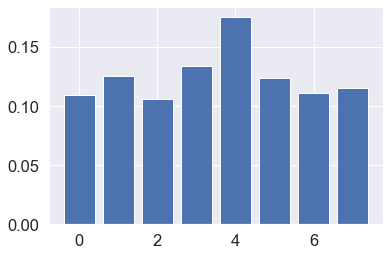

In [139]:
x = df.iloc[:, 0:8]
y = df.iloc[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()